In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
/bin/bash: line 1: chod: command not found


In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection")

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection


100%|██████████| 297M/297M [00:00<00:00, 789MB/s]


In [4]:
!nvidia-smi

Thu Sep 18 07:51:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00


In [6]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10



image 1/1 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images/1002_jpg.rf.74495c845455dec52db120e378834be9.jpg: 640x640 (no detections), 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3


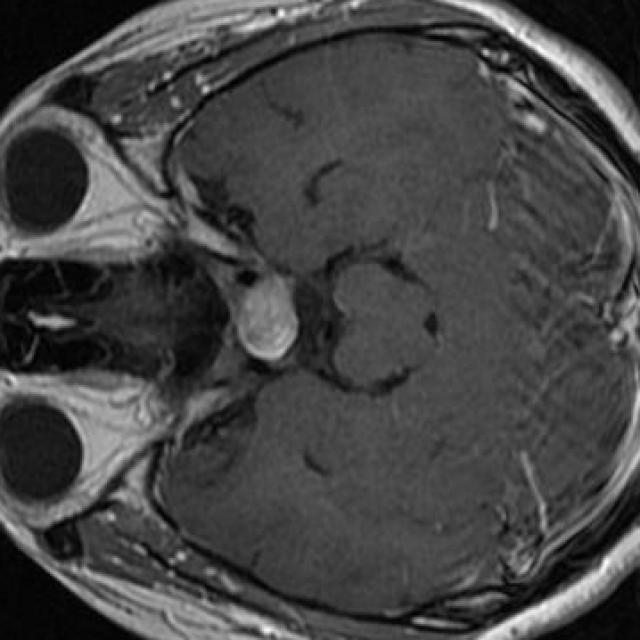

In [2]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo12n.pt")
result = model("/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images/1002_jpg.rf.74495c845455dec52db120e378834be9.jpg", conf=0.25, save=True)
result[0].show()

In [8]:
!pip install ruamel.yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 13.7 MB/s eta 0:00:00


Processing line: '0 0.35933147656250003 0.740947075 0.3342618390625 0.6963788296875 0.311977715625 0.6963788296875 0.2952646234375 0.6991643453124999 0.286908078125 0.7242339828125 0.25348189374999996 0.743732590625 0.25626740937500003 0.8077994421874999 0.2952646234375 0.8440111421875001 0.3537604453125 0.8690807796875 0.398328690625 0.8718662953124999 0.3927576609375 0.8328690812499999 0.3537604453125 0.8105849578125 0.367688021875 0.7827298046875 0.35933147656250003 0.740947075'
Error processing line '0 0.35933147656250003 0.740947075 0.3342618390625 0.6963788296875 0.311977715625 0.6963788296875 0.2952646234375 0.6991643453124999 0.286908078125 0.7242339828125 0.25348189374999996 0.743732590625 0.25626740937500003 0.8077994421874999 0.2952646234375 0.8440111421875001 0.3537604453125 0.8690807796875 0.398328690625 0.8718662953124999 0.3927576609375 0.8328690812499999 0.3537604453125 0.8105849578125 0.367688021875 0.7827298046875 0.35933147656250003 0.740947075': too many values to u

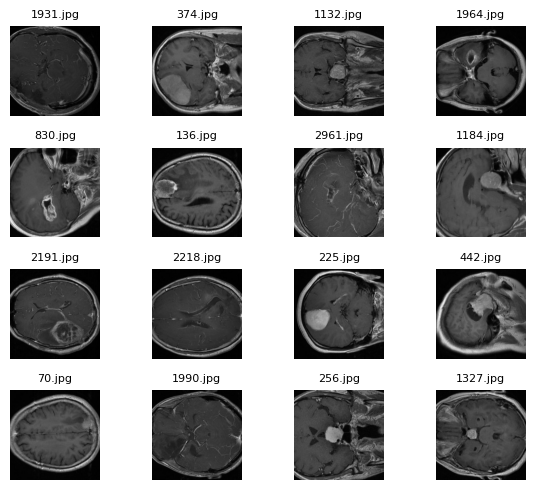

In [9]:
import cv2
import os
import matplotlib.pyplot as plt
import random

# Paths
image_dir = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images"
label_dir = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/labels"

# List of image files
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
sample_files = random.sample(image_files, 16)  # pick 9 random images

# Function to draw boxes
def draw_boxes(img_path, lbl_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape

    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            for line in f.readlines():
                print(f"Processing line: '{line.strip()}'")
                try:
                    cls, x, y, w, h = map(float, line.strip().split())
                    x1 = int((x - w / 2) * width)
                    y1 = int((y - h / 2) * height)
                    x2 = int((x + w / 2) * width)
                    y2 = int((y + h / 2) * height)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(img, f"Class {int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
                except ValueError as e:
                    print(f"Error processing line '{line.strip()}': {e}")
                    continue  # Skip problematic line
    return img

# Plot the images
plt.figure(figsize=(6, 5))
for i, file in enumerate(sample_files):
    img_path = os.path.join(image_dir, file)
    label_path = os.path.join(label_dir, file.replace('.jpg', '.txt'))
    img_with_boxes = draw_boxes(img_path, label_path)
    plt.subplot(4, 4, i + 1)
    # Show only base filename without extensions or hash
    short_title = os.path.splitext(file)[0].split('_jpg')[0] + '.jpg'
    plt.title(short_title, fontsize=8)
    plt.imshow(img_with_boxes)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:

import sys
import ruamel.yaml

yaml = ruamel.yaml.YAML()


with open('/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/data.yaml') as fp:
  data = yaml.load(fp)
  # Correct the paths to the image directories
  data['train'] = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images"
  data['test'] = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images"
  data['val'] = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images"

  print(data['train'])
  print(data['test'])
  print(data['val'])

  # save the files
  with open('data.yaml', 'w') as fp :
    yaml.dump(data, fp)

/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images
/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images
/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images


In [4]:
model = YOLO('yolo12n.pt')

results = model.train(data="data.yaml", epochs=30, imgsz=640)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

In [5]:
odel = YOLO('yolo12n.pt')
model = YOLO('/content/runs/detect/train/weights/best.pt')
# Validate the model
metrics = model.val()

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,313 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 812.9±248.0 MB/s, size: 30.9 KB)
val: Scanning /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 612/612 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 39/39 5.0it/s 7.9s
                   all        612        612      0.901      0.884      0.934      0.722
                glioma        285        285      0.835      0.782      0.864      0.577
            meningioma        142        142      0.944      0.955      0.975      0.839
             pituitary        185        185      0.924      0.916      0.963       0.75
Speed: 0.9ms preprocess, 6.4ms inference, 0.0ms loss, 1.3ms postprocess


image 1/1 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images/1002_jpg.rf.74495c845455dec52db120e378834be9.jpg: 640x640 1 pituitary, 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict4


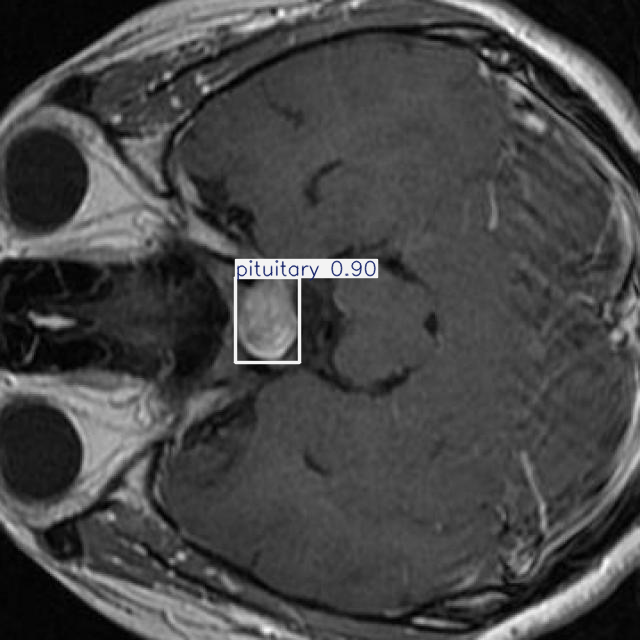

In [6]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
result = model('/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images/1002_jpg.rf.74495c845455dec52db120e378834be9.jpg', conf=0.25, save=True)
result[0].show()

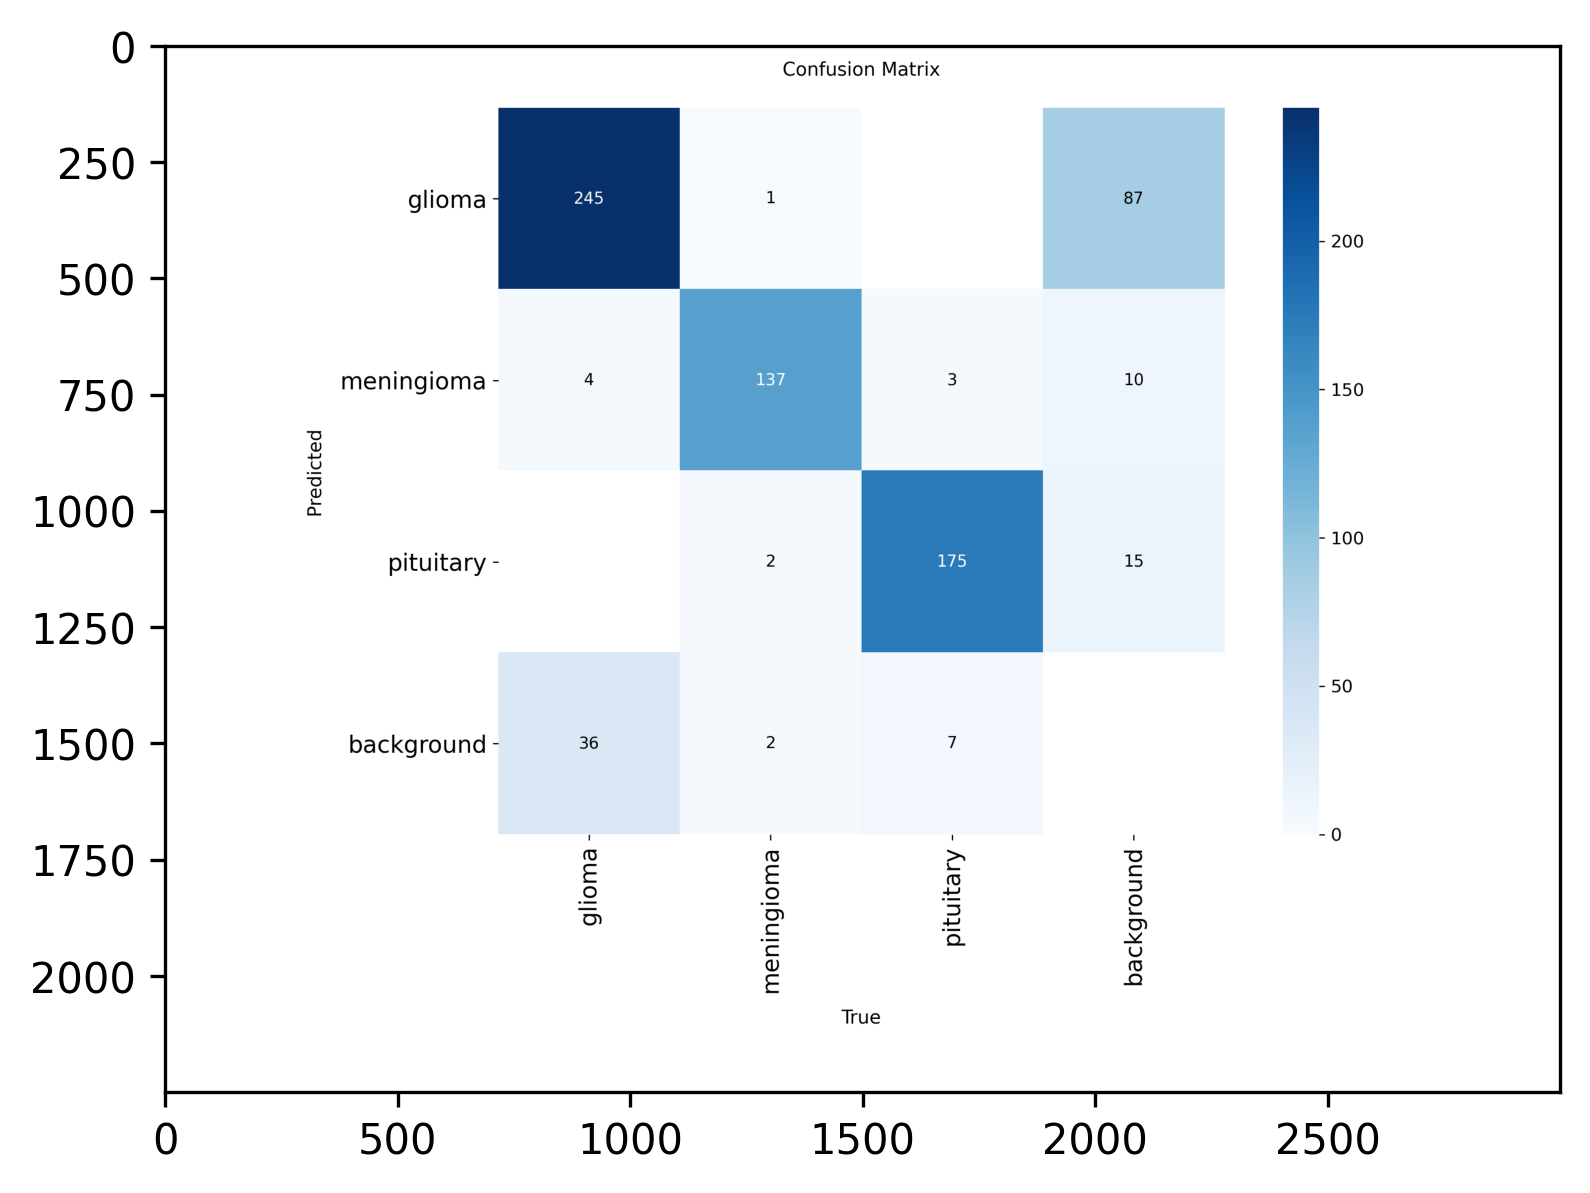

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/confusion_matrix.png'))

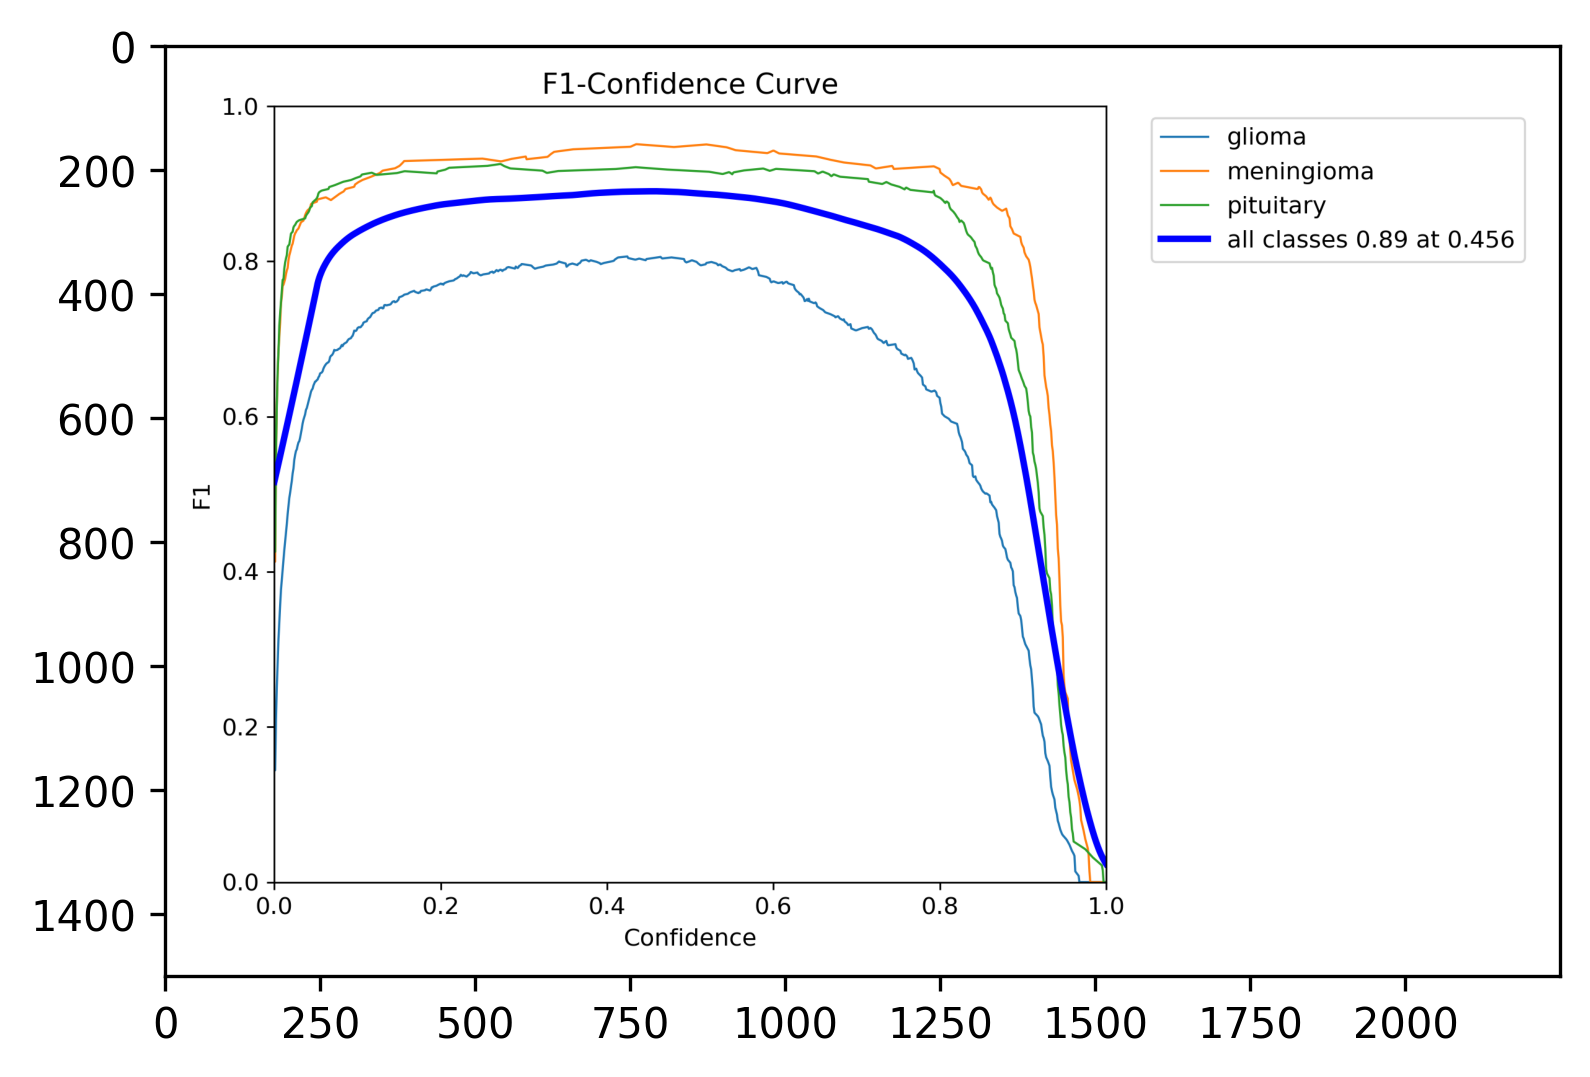

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/BoxF1_curve.png'))

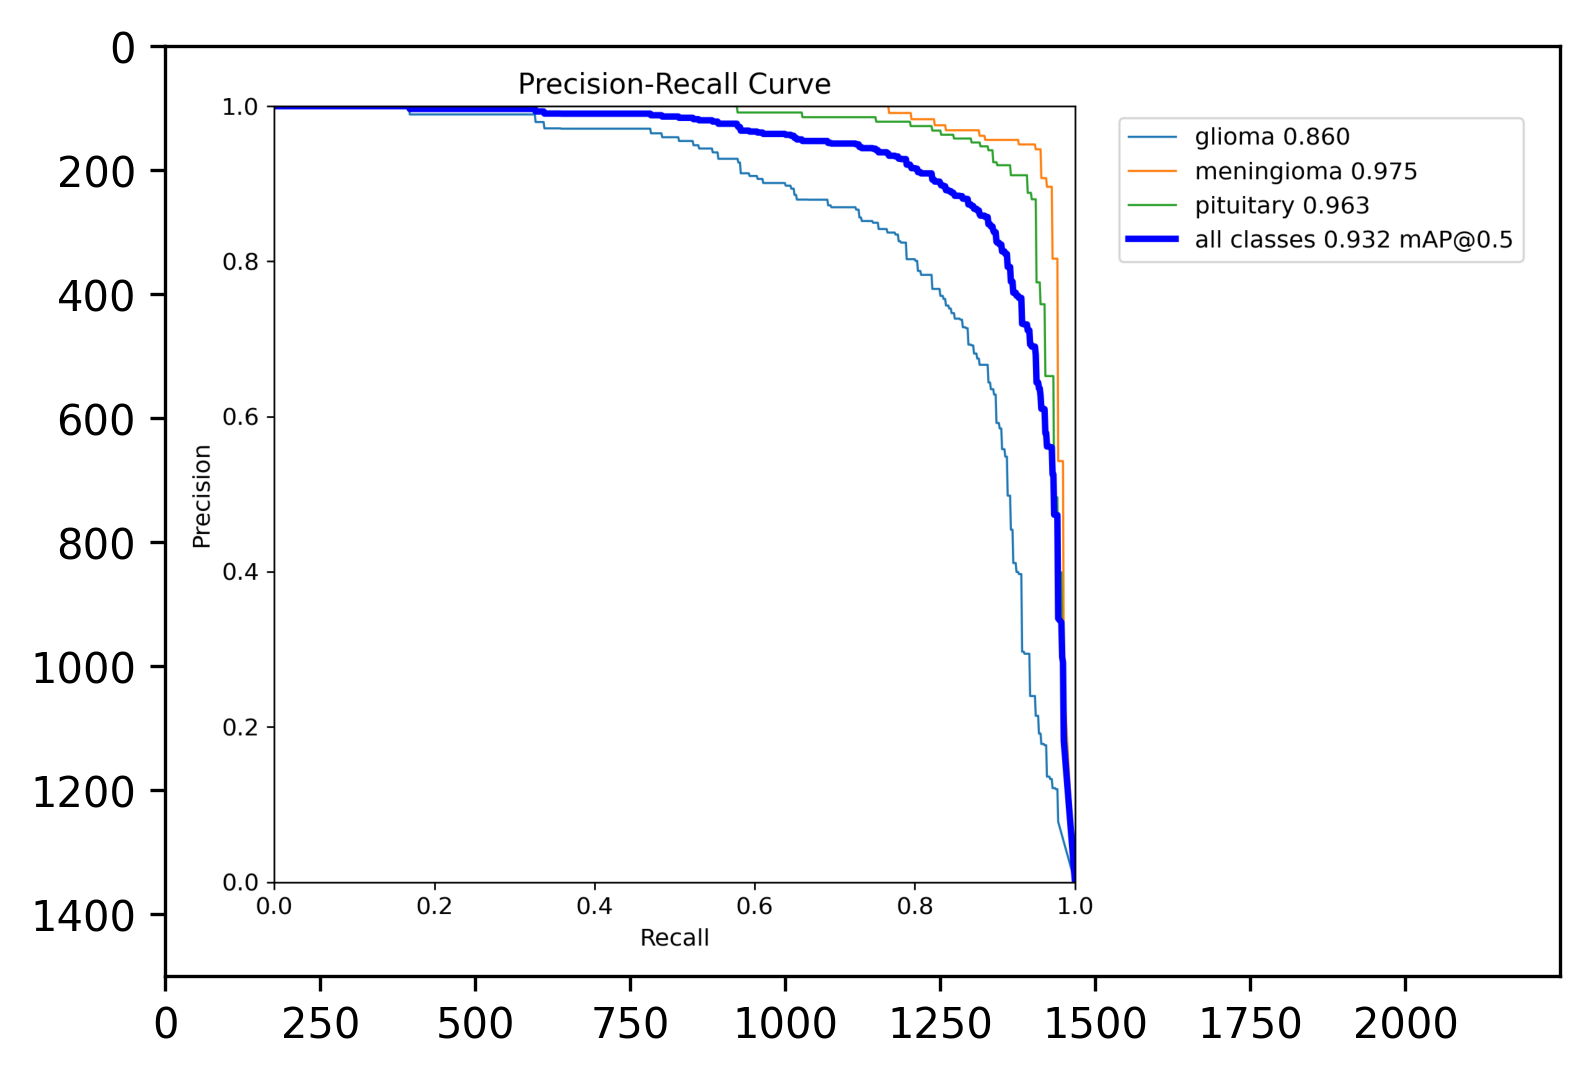

In [10]:
plt.figure(figsize=(6,6), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/BoxPR_curve.png'))

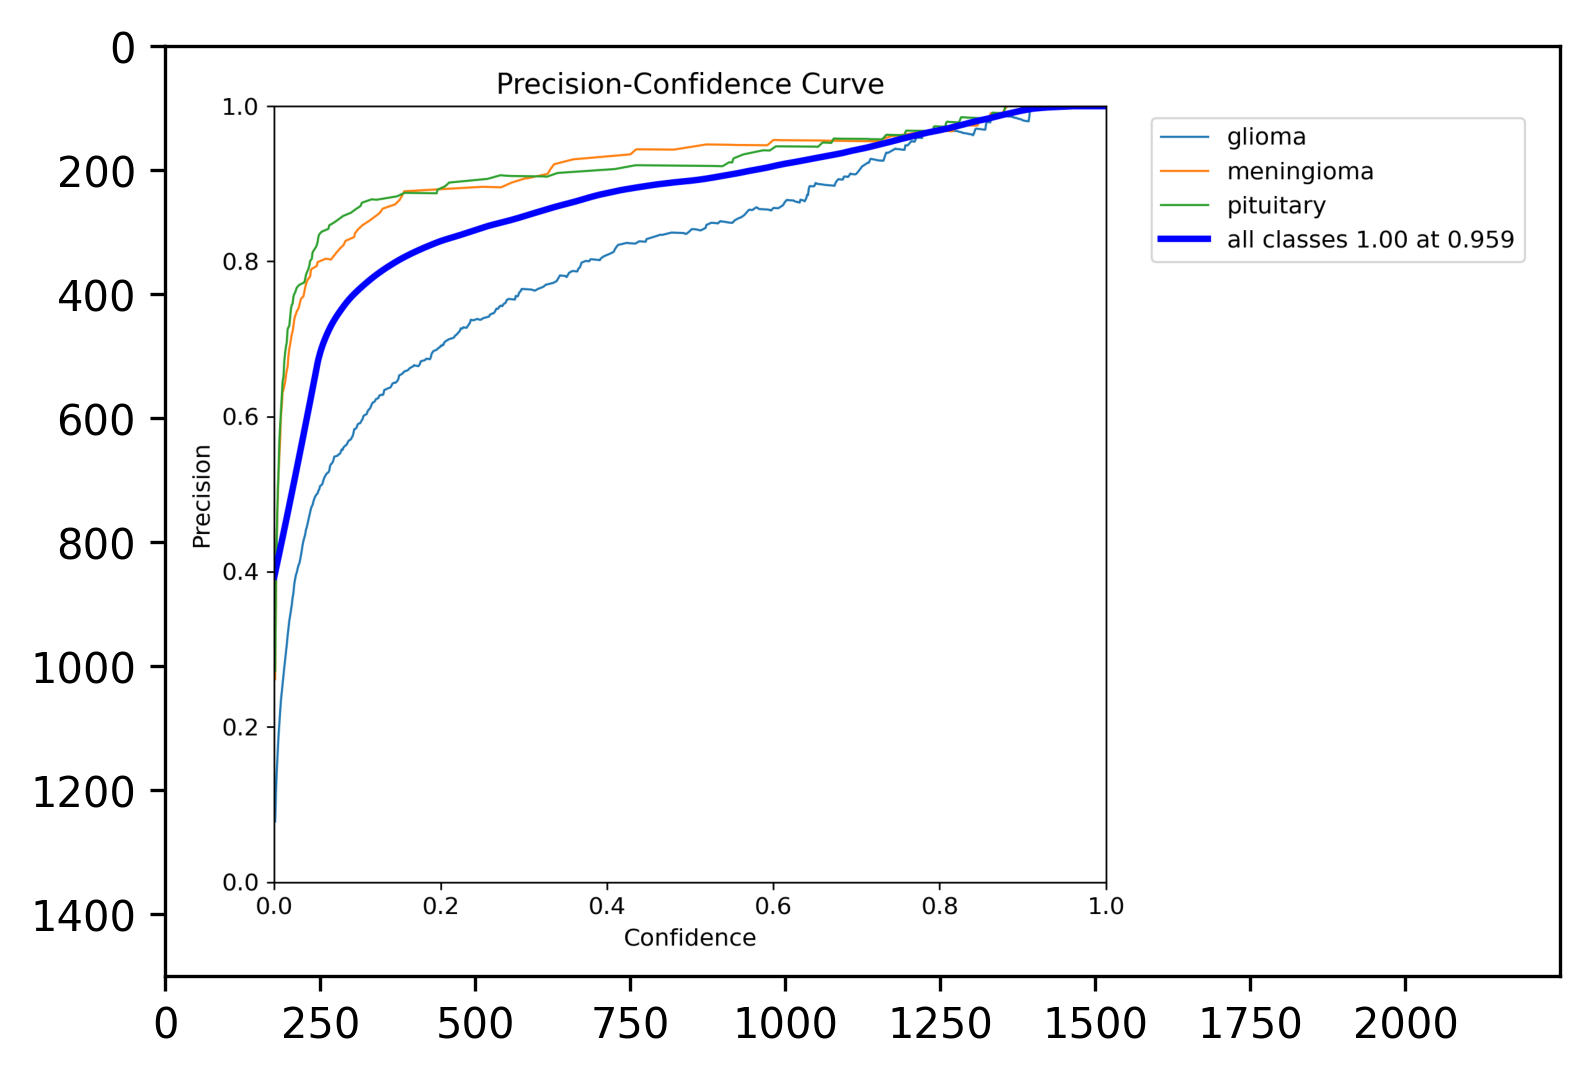

In [11]:
plt.figure(figsize=(6,6), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/BoxP_curve.png'))

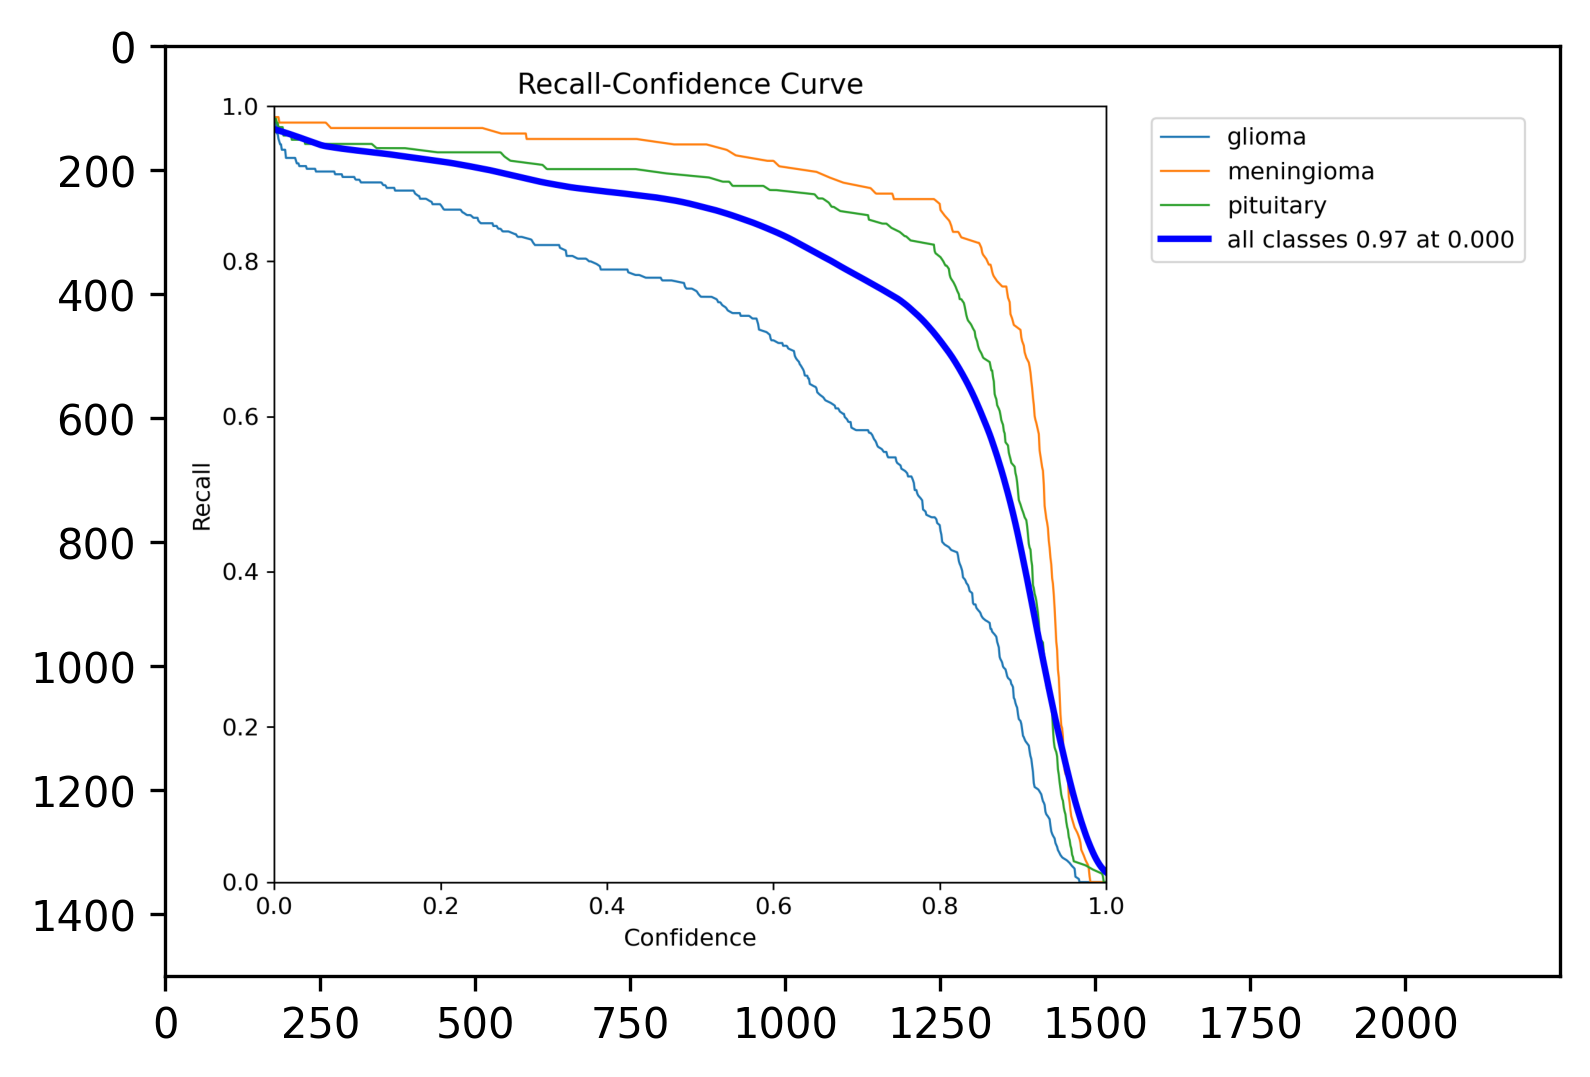

In [12]:
plt.figure(figsize=(6,6), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/BoxR_curve.png'))

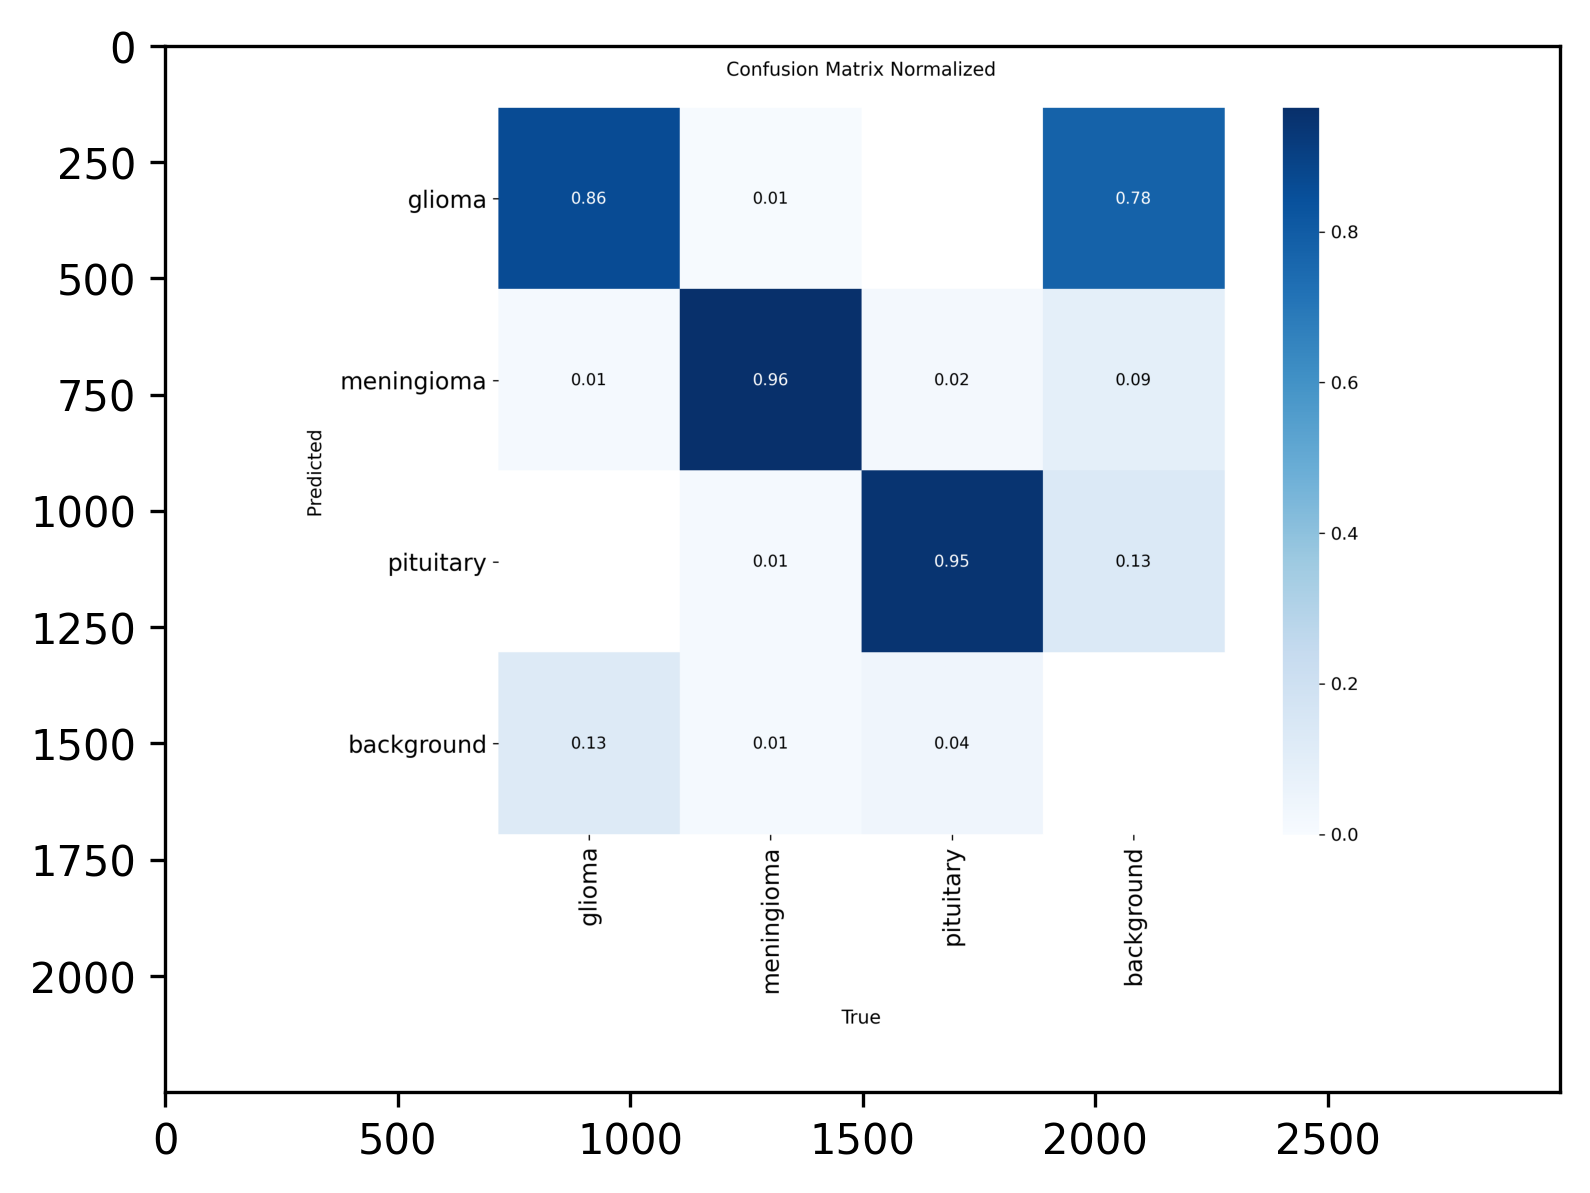

In [13]:
plt.figure(figsize=(6,6), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/confusion_matrix_normalized.png'))

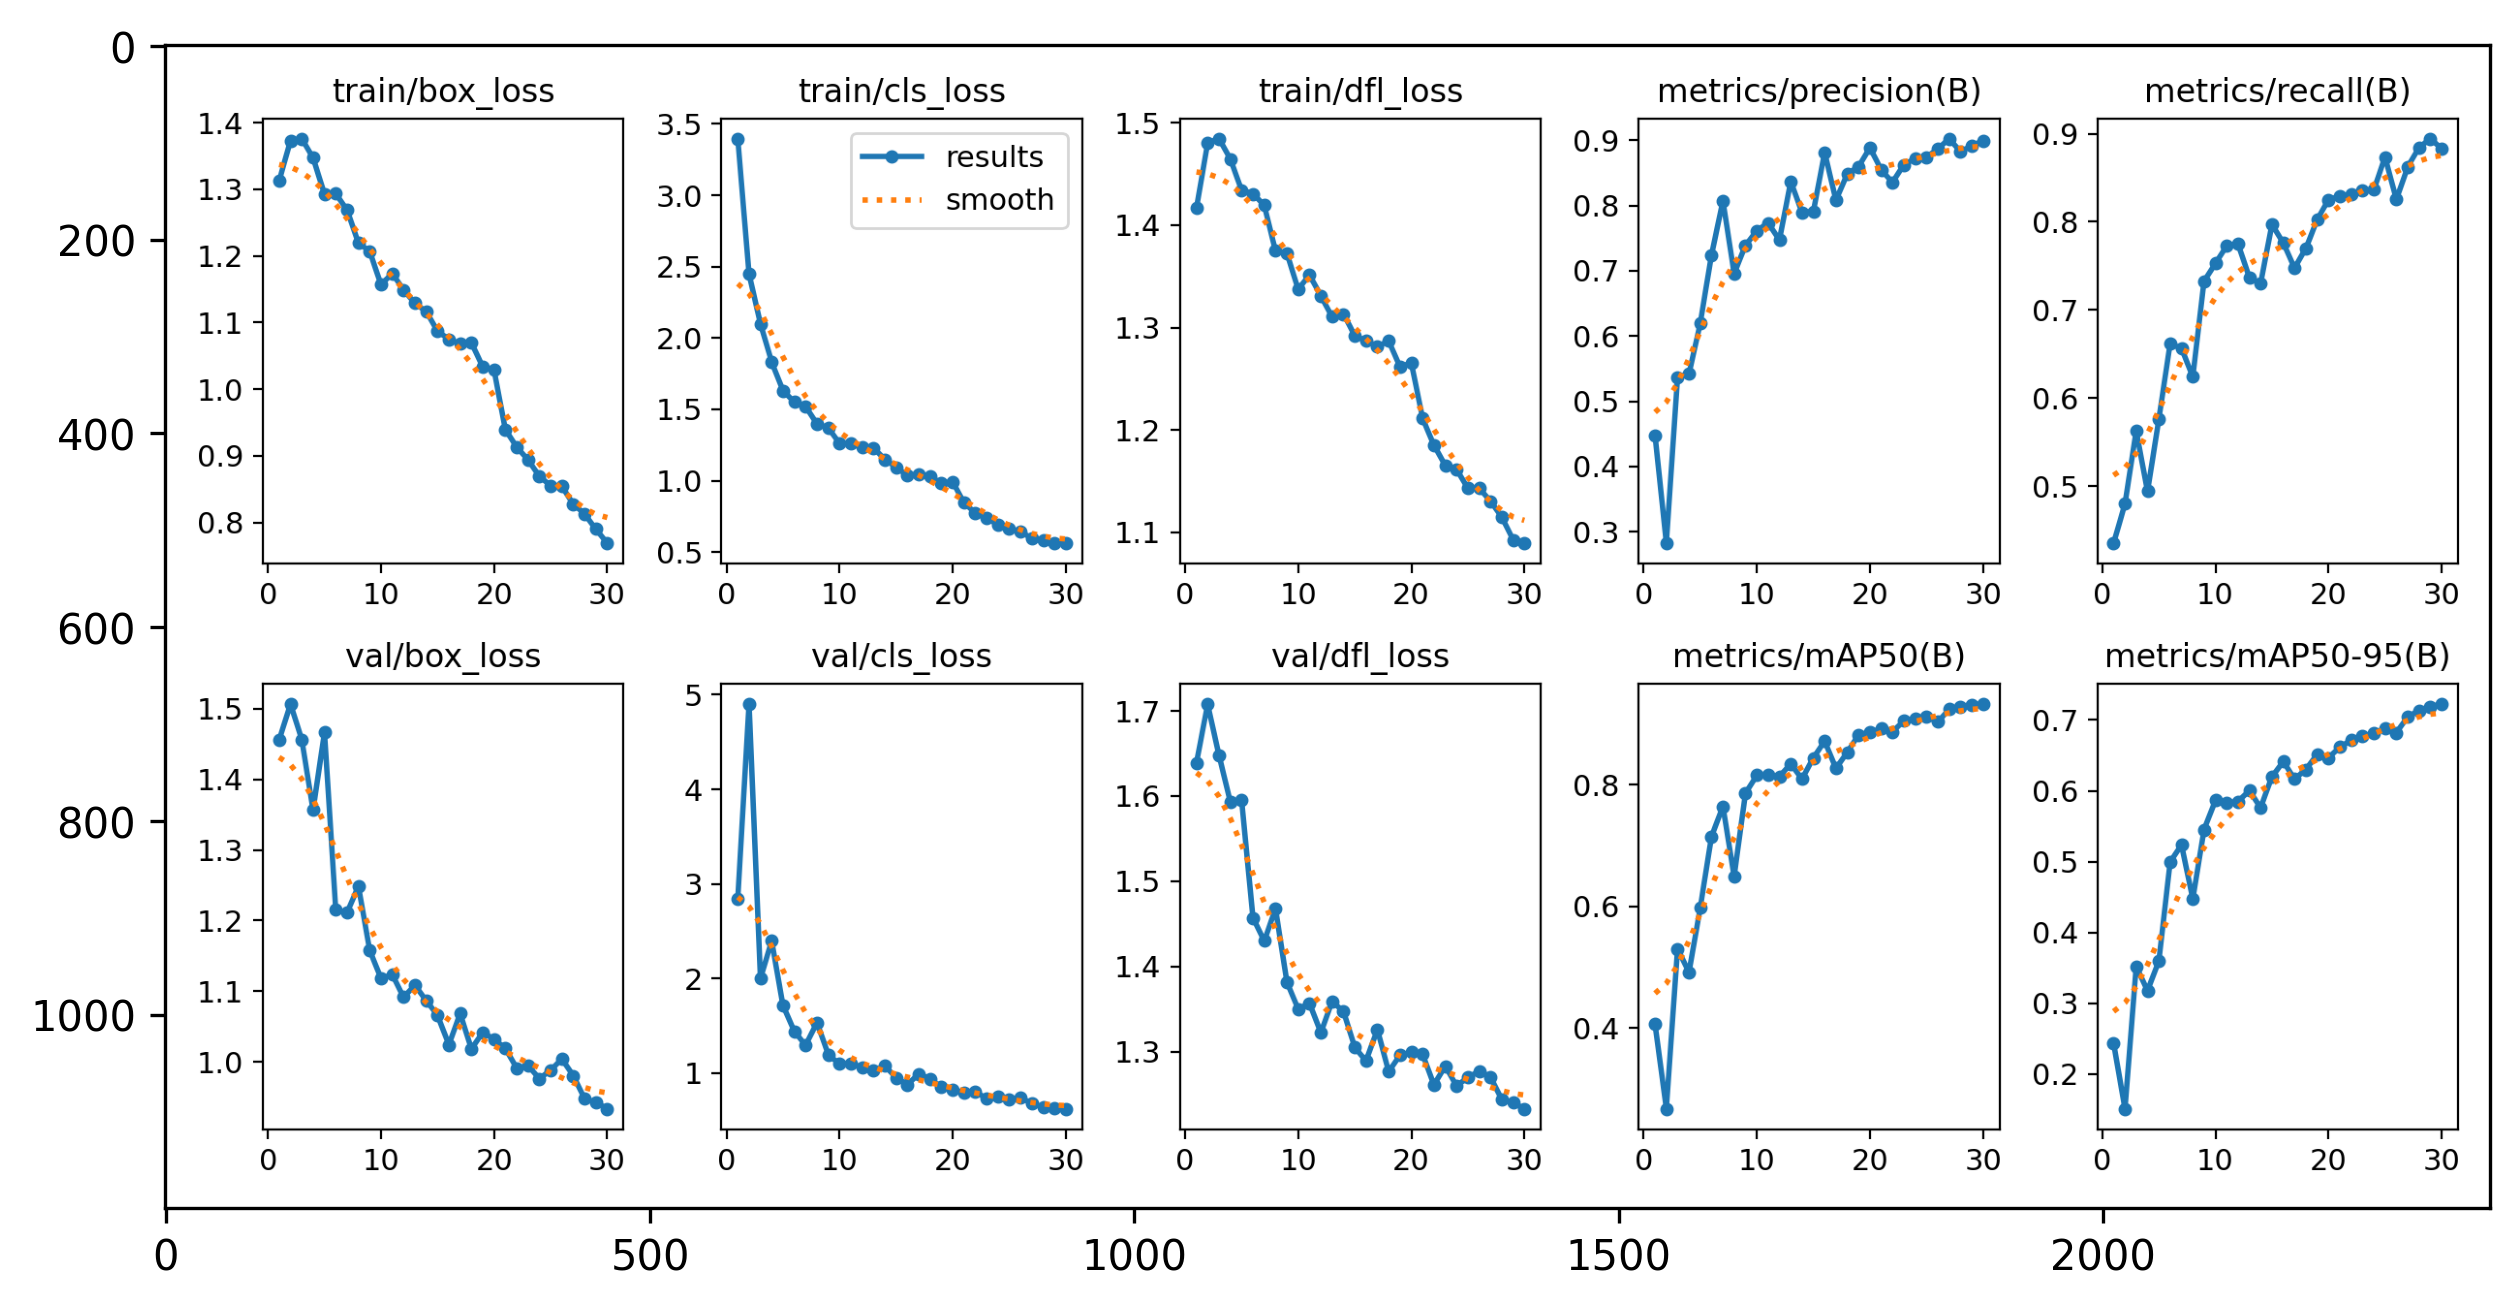

In [14]:
plt.figure(figsize=(10,14 ), dpi=300)

plt.imshow(plt.imread('/content/runs/detect/train/results.png'))


image 1/1 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg: 640x640 1 pituitary, 15.9ms
Speed: 2.5ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


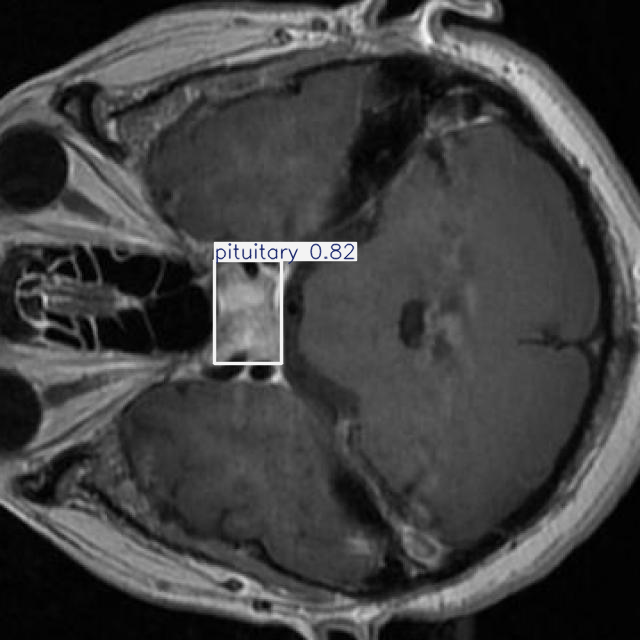

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
result = model('/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg', conf=0.25, save=True)
result[0].show()


image 1/308 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/1003_jpg.rf.028d6d76fba92dd9e5dc59dc9d0f7293.jpg: 640x640 1 pituitary, 13.4ms
image 2/308 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/1012_jpg.rf.a9d8d27f5e1d382e0b93ff4a479f4519.jpg: 640x640 2 pituitarys, 12.5ms
image 3/308 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 16.7ms
image 4/308 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/102_jpg.rf.e58e0fc30dfea3a7a410d7b901223f16.jpg: 640x640 1 meningioma, 20.4ms
image 5/308 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images/1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg: 640x640 1 pituitary, 12.6ms
image 6/308 /content/medical-image-dataset-brain-tumor-detection/BrainTumor/Br

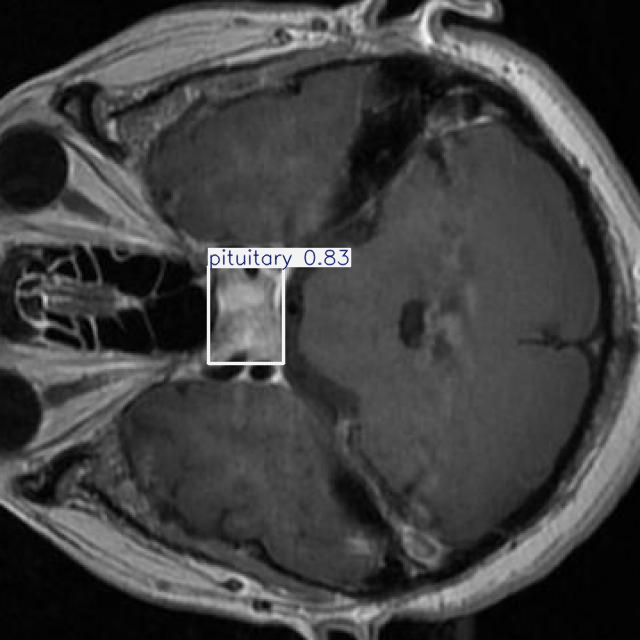

In [15]:
model = YOLO('/content/runs/detect/train/weights/best.pt')
result = model('/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images', conf=0.25, save=True)
result[0].show()


0: 640x640 1 pituitary, 15.6ms
Speed: 1.7ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Inference Latency (single image): 0.0886 seconds

0: 640x640 1 pituitary, 18.2ms
Speed: 1.7ms preprocess, 18.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 20.4ms
Speed: 1.8ms preprocess, 20.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 11.8ms
Speed: 1.3ms preprocess, 11.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 11.8ms
Speed: 1.3ms preprocess, 11.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 12.5ms
Speed: 1.5ms preprocess, 12.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 11.7ms
Speed: 1.3ms preprocess, 11.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 11.7ms
Speed: 1.3ms pre

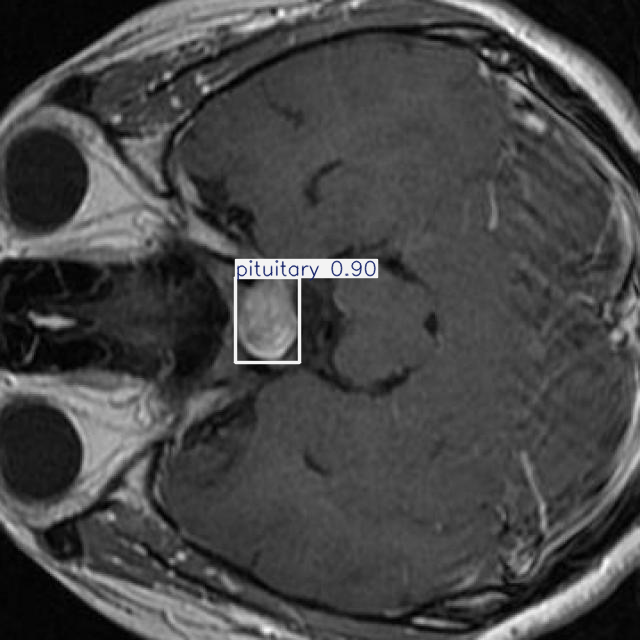

In [17]:
import time
import torch
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt

# Assuming the model is already loaded
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load a sample image
img_path = '/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images/1002_jpg.rf.74495c845455dec52db120e378834be9.jpg'  # Replace with actual image path
img = Image.open(img_path)

# Measure inference latency
start_time = time.time()
results = model(img)  # Run inference
latency = time.time() - start_time  # Time taken to process one image

print(f"Inference Latency (single image): {latency:.4f} seconds")

# Measure inference speed (FPS) by running the model on multiple images
batch_size = 10  # Number of images to test for speed
images = [img] * batch_size  # Create a batch of the same image for testing

start_time = time.time()
for img in images:
    results = model(img)  # Run inference on each image in the batch
inference_time = time.time() - start_time
fps = batch_size / inference_time  # Frames per second (FPS)

print(f"Inference Speed (FPS): {fps:.2f} images per second")

# Optionally, display a sample result
# Display each result in the list
for result in results:
    result.show()

Checking folder: /content/runs/detect/predict5
Files in folder: ['808_jpg.rf.97f1beadeac516003bbfc111b98a5561.jpg', '234_jpg.rf.19fbc092be70165d474d671de82d77a2.jpg', '38_jpg.rf.1a9b0715faf5528bc2070c2b8e786241.jpg', '2868_jpg.rf.52075c63e7df642f333876ba41e487e6.jpg', '2401_jpg.rf.605ecb1bcd25a099a492d60bed8e4c29.jpg', '1681_jpg.rf.f1be96380961b6e977776a9d73c8f01d.jpg', '2422_jpg.rf.e6f2adf3e3de342608dfcb8c63f7e201.jpg', '2032_jpg.rf.7ff78b48dc4e5d376e7fc8249b7e59f5.jpg', '2242_jpg.rf.2a39144f4a2f0c1e6b3af1631549f60d.jpg', '1951_jpg.rf.eb08d051c58cf70408f3def1b2f274de.jpg', '2735_jpg.rf.78d6e2a2559ddf3c2479eb7f72dd7de9.jpg', '729_jpg.rf.8b38a672084b1a657486ea01112caecd.jpg', '916_jpg.rf.a00683f3f153d2e361a9867caa9ce6bb.jpg', '2100_jpg.rf.2910fd99c8bdd49d25d56f4c9f97068b.jpg', '309_jpg.rf.33785c14232d6ede3876d09968debfac.jpg', '1033_jpg.rf.1b4c0f5bdf30ec0ba218874a3a737720.jpg', '2109_jpg.rf.93f55acd8ce5c8fb728c6705602fe153.jpg', '58_jpg.rf.f3c516fd23aa8c8c65025dc08285ef2d.jpg', '3003_jp

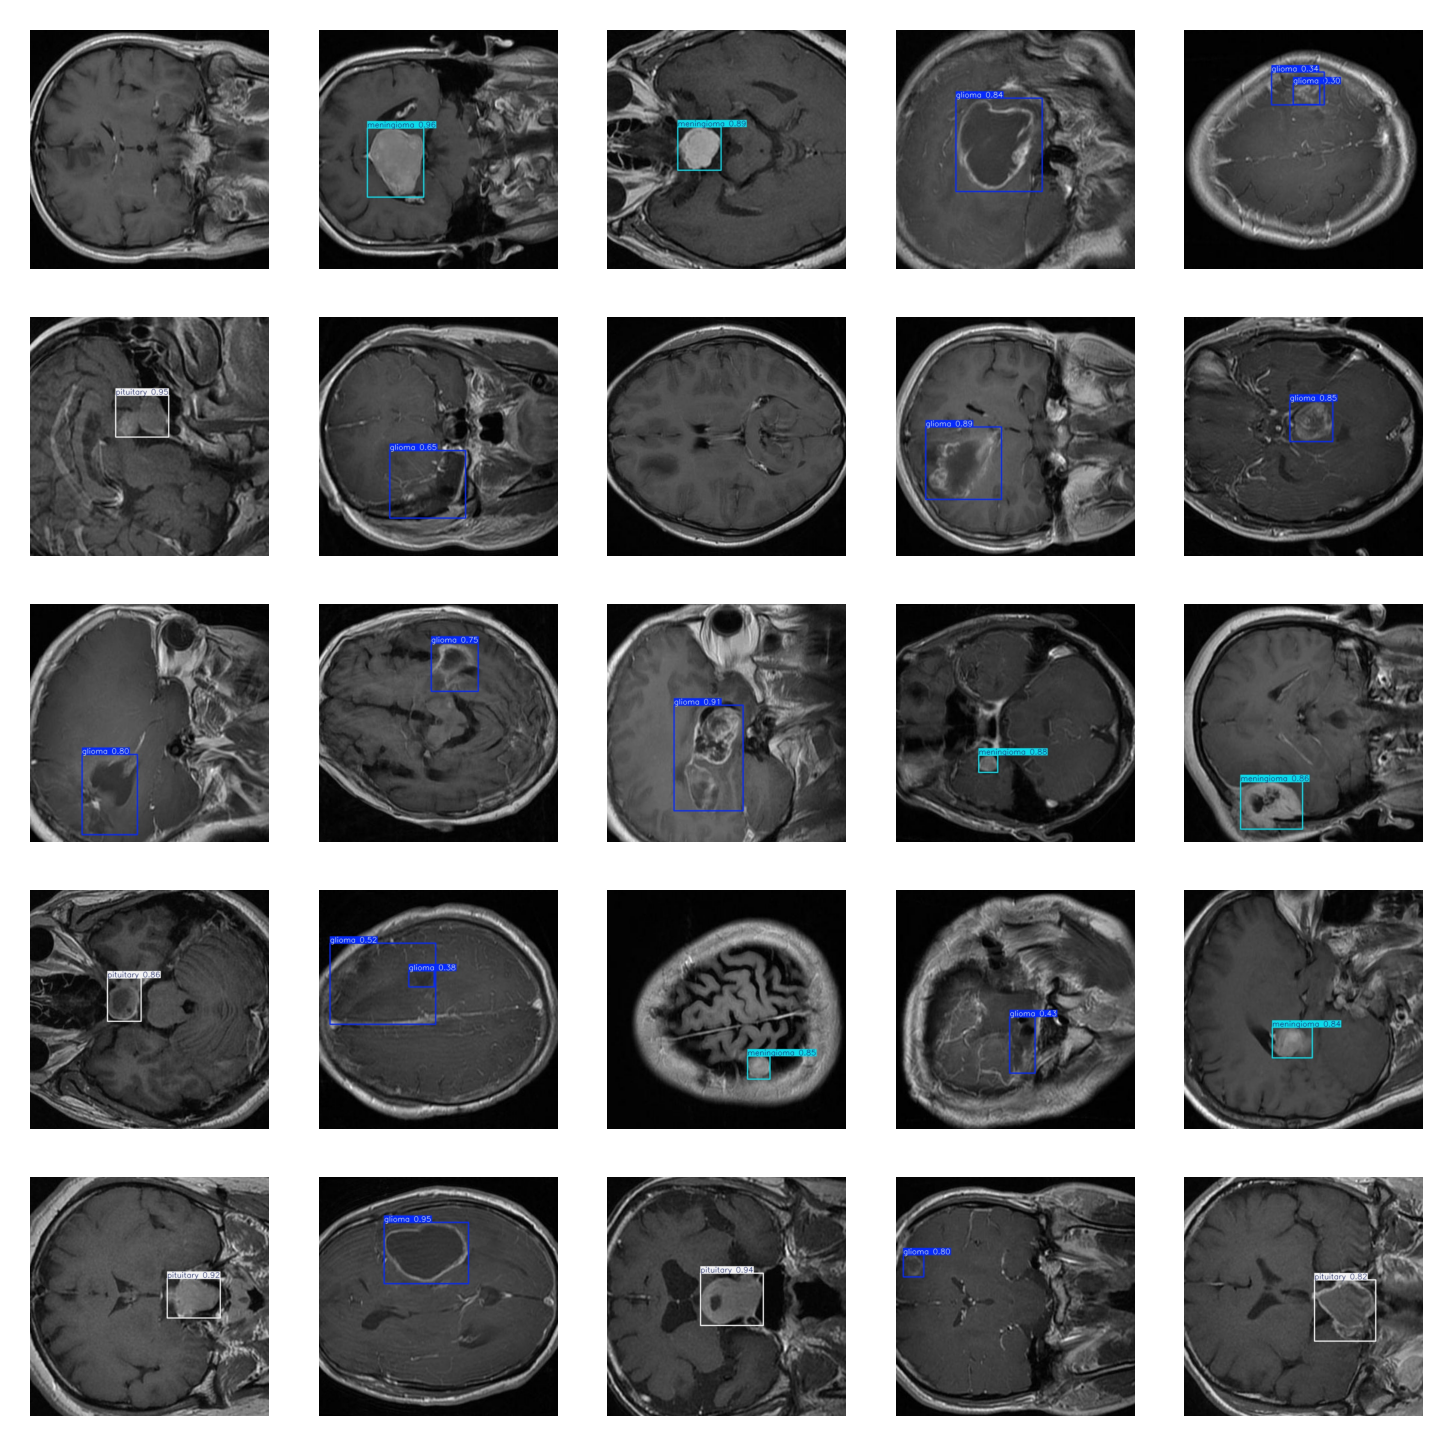

In [18]:
import glob
import matplotlib.pyplot as plt
import os

def read_images_from_folder(folder, img_ext):
    images = []
    print(f"Checking folder: {folder}")
    if not os.path.exists(folder):
        print(f"Folder does not exist: {folder}")
        return images

    # List files in folder for debugging
    print("Files in folder:", os.listdir(folder))

    # Look for specific file extensions
    for filename in glob.glob(f"{folder}/*.{img_ext}"):
        print(f"Reading {filename}")  # Debugging line
        img = plt.imread(filename)
        if img is not None:
            images.append(img)
    return images

def sample_images9(images):
    sample = []
    num_to_sample = min(25, len(images))  # Sample up to the number of available images
    for i in range(num_to_sample):
        sample.append(images[i])
    return sample

def show_images(images):
    if not images:
        print("No images to display.")
        return
    fig = plt.figure(figsize=(6, 6), dpi=300)
    columns = 5
    rows = 5
    for i in range(1, len(images) + 1):
        img = images[i-1]
        ax = fig.add_subplot(rows, columns, i)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Ensure the folder path and extension are correct
images_val = read_images_from_folder('/content/runs/detect/predict5', 'jpg')
sample_images = sample_images9(images_val)
show_images(sample_images)
